## Introduction

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| Required to import, and briefly discuss, the libraries that will be used throughout analysis and modelling. |

---

In [2]:
from comet_ml import Experiment
from comet_ml.integration.sklearn import log_model

experiment = Experiment(
  api_key="hbu6nFnbDgCuG2gKUAdO3w4D2",
  project_name="classification-sprint-team-jm5",
  workspace="gzukhanye-gmail-com")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/gzukhanye-gmail-com/classification-sprint-team-jm5/447d9d4c2c18405f82173ec5870b51d3



In [3]:
import nltk
from nltk import FreqDist, bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Libraries for data loading, data manipulation and data visulisation
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
import matplotlib.pyplot as plt  # For basic data visualization
import seaborn as sns  # For enhanced data visualization
import re
import nltk
import string

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.utils import to_categorical


from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, EarlyStopping

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud

# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42 ###



In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| Load the data from the `train and test` file into a DataFrame. |

---

In [7]:
# loaded the data from the df file as a dataFrame
df_train = pd.read_csv("train.csv") 
df_test = pd.read_csv("test.csv")

In [8]:
df_train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| Perform an in-depth analysis of all the variables in the DataFrame. |

---


In [9]:
#Displays the number of rows and columns 
df_train.shape
df_test.shape

(10546, 2)

In [10]:
#Displays info about the columns 'message' is categorical whereas 'tweetId' & 'sentiment' are numerical
df_train.info()
print("\n")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


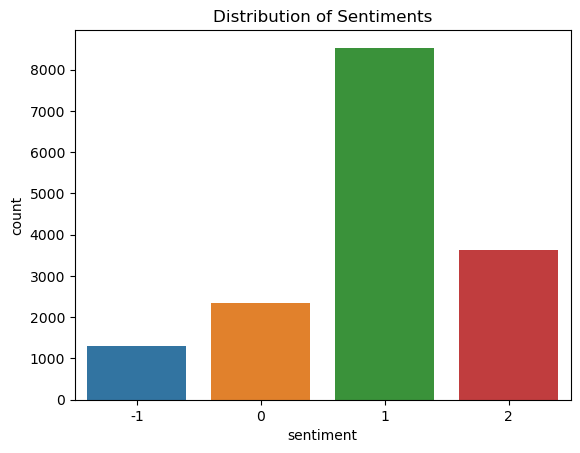

In [11]:
#The distribution of classes in 'sentiment'
sns.countplot(x='sentiment', data=df_train)
plt.title('Distribution of Sentiments')
plt.show()

Class Description

2 News: the tweet links to factual news about climate change

1 Pro: the tweet supports the belief of man-made climate change

0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change

-1 Anti: the tweet does not believe in man-made climate change Variable definitions

#### Tweet Data Analysis

1. Average length of tweets

In [12]:
# Analyze the characteristics of the tweet text
df_train['tweet_length'] = df_train['message'].apply(len)

2. Distribution of tweet length

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


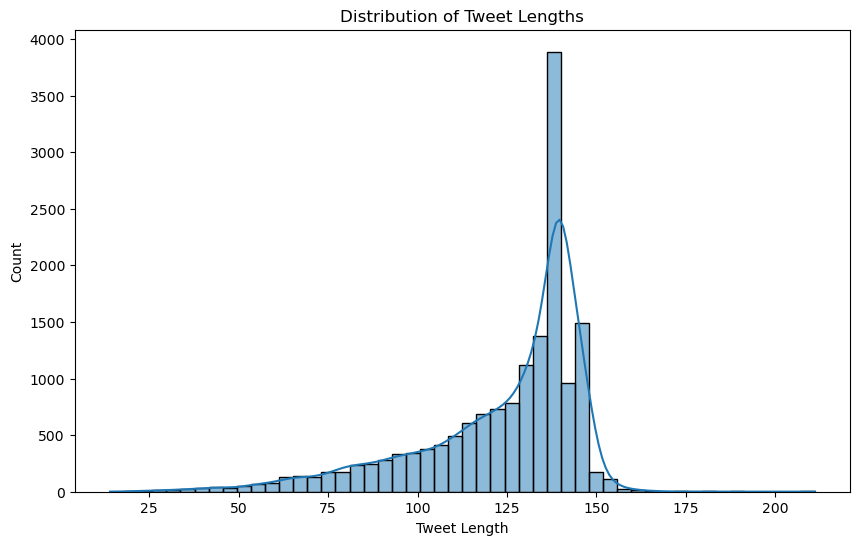

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.show()

3. Common words and phrases

Concatenates the all the tweets into a single string and tokenises the text into individual words and outputs the most common words & its frequencies


In [14]:
all_text = ' '.join(df_train['message'].astype(str))

tokens = word_tokenize(all_text)
fdist = FreqDist(tokens)
common_words = fdist.most_common(10)
print("Common Words:", common_words)

bi_grams = list(bigrams(tokens))
bi_gram_freq = FreqDist(bi_grams)
common_bigrams = bi_gram_freq.most_common(10)
print("Common Bigrams:", common_bigrams)

Common Words: [(':', 22517), ('@', 14835), ('climate', 12607), ('change', 12332), ('https', 10001), ('RT', 9717), ('.', 7283), ('to', 7083), ('the', 6421), (',', 6152)]
Common Bigrams: [(('climate', 'change'), 12006), (('https', ':'), 10001), (('RT', '@'), 9616), (('global', 'warming'), 3287), (('change', '.'), 1391), (('change', 'https'), 1342), (('on', 'climate'), 1171), (('change', 'is'), 1166), (('.', 'https'), 1061), (('&', 'amp'), 940)]


4. WordCloud

WordCloud: data visualization technique used for representing text data
in which the size of each word indicates its frequency or importance.
widely used for analyzing data from social network websites. (Twitter)
1 is the reference class(people who are in support of climate change)


Text(0.5, 1.0, 'WordCloud for Positive Sentiments')

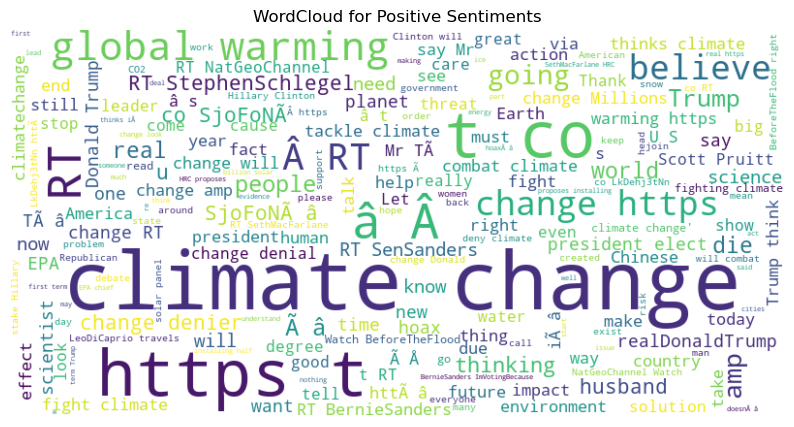

In [15]:


positive_tweets = df_train[df_train['sentiment'] == 1]['message'].values
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Positive Sentiments')

5. Verify for any null values

In [16]:
df_train.isnull().sum()
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

### Cleaning data
Removing all the null values



In [17]:
df_train.isnull().sum()

sentiment       0
message         0
tweetid         0
tweet_length    0
dtype: int64

In [18]:
df_test.isnull().sum()

message    0
tweetid    0
dtype: int64

This function turns the sentiment codes into actual words Pro for 1, Anti for -1, Neutral for 0 and News for 2 which will make it easier for us to explore and visualise the data.

In [19]:
def clean_sentiment(df):
    """This function turns the sentiment codes into actual words which will make it easier for us to see"""

    # creating an empty list for storage
    sentiment_list = []

    # Going through each sentiment and changing them accordingly, this is what this loop and the if statements do.
    for number in df['sentiment'] :

        if number == 1 :
            sentiment_list.append('Pro')

        elif number == 0 :
            sentiment_list.append('Neutral')

        elif number == -1 :
            sentiment_list.append('Anti')

        else :
            sentiment_list.append('News')

    # putting our sentiments in the column named 'sentiment' to our dataframe
    df['sentiment'] = sentiment_list

    return df
clean_sentiment(df_train)

,sentiment,message,tweetid,tweet_length
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62
2,News,RT @RawStory: Researchers say we have three ye...,698562,140
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122
...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,140
15815,News,RT @washingtonpost: How climate change could b...,17856,119
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,129


We are extracting hashtags to know which sentiment likes which hashtag.

In [20]:
def hashtag_extract(tweet):
    """Helper function to extract hashtags"""
    # creating a empty list for storage where we will keep our Hashtags later
    hashtags = []

    # Going through each tweet and looking for each hashtag and appending the Hashtags in our empty list hashtags
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    # finding the sum of the elements in the list hashtag
    hashtags = sum(hashtags, [])

    # creating a dictionary with tokens from the list hashtags into a dictionary, where the keys are the frequency and the values is the frequency
    frequency = nltk.FreqDist(hashtags)

    # creating a dataframe from the dictionary to keep track of the word and the frequency
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                           'count': list(frequency.values())})

    # method is used to get n largest values from a dataframe
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df

def hashtag_extract(tweet):
    """Helper function to extract hashtags"""
    # creating a empty list for storage where we will keep our Hashtags later
    hashtags = []

    # Going through each tweet and looking for each hashtag and appending the Hashtags in our empty list hashtags
    for i in tweet:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    # finding the sum of the elements in the list hashtag
    hashtags = sum(hashtags, [])

    # creating a dictionary with tokens from the list hashtags into a dictionary, where the keys are the frequency and the values is the frequency
    frequency = nltk.FreqDist(hashtags)

    # creating a dataframe from the dictionary to keep track of the word and the frequency
    hashtag_df = pd.DataFrame({'hashtag': list(frequency.keys()),
                           'count': list(frequency.values())})

    # method is used to get n largest values from a dataframe
    hashtag_df = hashtag_df.nlargest(15, columns="count")

    return hashtag_df


#Extracting the hashtags for the pro sentiment tweets
pro = hashtag_extract(df_train['message'][df_train['sentiment'] == 'Pro'])

#Extracting the hashtags for the Anti sentiment tweets
anti = hashtag_extract(df_train['message'][df_train['sentiment'] == 'Anti'])

#Extracting the hashtags for the Neutral sentiment tweets
neutral = hashtag_extract(df_train['message'][df_train['sentiment'] == 'Neutral'])

#Extracting the hashtags for the News sentiment tweets
news = hashtag_extract(df_train['message'][df_train['sentiment'] == "News"])


#creating a dataframe with all the hashtags and a count for each sentiment
df_hashtags = pro.merge(anti,on='hashtag',suffixes=('_pro', '_anti'), how = 'outer').merge(neutral,on='hashtag', how = 'outer').merge(news,on='hashtag', suffixes = ('_neutral', '_news'), how = 'outer')
df_hashtags


,hashtag,count_pro,count_anti,count_neutral,count_news
0,climate,187.0,10.0,16.0,130.0
1,BeforeTheFlood,129.0,NaN,4.0,NaN
2,climatechange,94.0,6.0,11.0,42.0
3,ImVotingBecause,62.0,NaN,NaN,NaN
4,COP22,59.0,NaN,3.0,13.0
5,ParisAgreement,50.0,4.0,NaN,9.0
6,ActOnClimate,42.0,NaN,NaN,NaN
7,Ã,37.0,NaN,NaN,NaN
8,Trump,34.0,7.0,11.0,25.0
9,IVotedBecause,33.0,NaN,NaN,NaN


In [21]:
# Separate joined words based on capitals
def camel_case_split(identifier):

    matches = re.finditer(
        r'.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)',
        identifier
    )
    return " ".join([m.group(0) for m in matches])

# Extract Mentions
def extract_mentions(tweet):

  """Helper function to extract mentions"""
  mentions = re.findall(r'@([a-zA-Z0-9_]{1}[a-zA-Z0-9_]{0,14})', tweet)

  return mentions

#Applying the function on the dataframe
df_train['mentions'] = df_train['message'].apply(extract_mentions)
df_train

,sentiment,message,tweetid,tweet_length,mentions
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,[mashable]
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,[]
2,News,RT @RawStory: Researchers say we have three ye...,698562,140,[RawStory]
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,[]
4,Pro,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,122,[SoyNovioDeTodas]
...,...,...,...,...,...
15814,Pro,RT @ezlusztig: They took down the material on ...,22001,140,[ezlusztig]
15815,News,RT @washingtonpost: How climate change could b...,17856,119,[washingtonpost]
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133,[]
15817,Anti,RT @sara8smiles: Hey liberals the climate chan...,819732,129,[sara8smiles]


In [22]:
# Create a list of all the mentions
mentions_list = [item for new_list in df_train['mentions'] for item in new_list]

# Grouping mentions by sentiment
# News Mentions
news_mentions = df_train[df_train['sentiment'] == 'News']['mentions']
news_mentions = [x for x in news_mentions if x != []]
news_mentions = [item for new_list in news_mentions for item in new_list]

# Positive Mentions
pos_mentions = df_train[df_train['sentiment'] == 'Pro']['mentions']
pos_mentions = [x for x in pos_mentions if x != []]
pos_mentions = [item for new_list in pos_mentions for item in new_list]

# Neutral Mentions
neutral_mentions =df_train[df_train['sentiment'] == 'Neutral']['mentions']
neutral_mentions = [x for x in neutral_mentions if x != []]
neutral_mentions = [item for new_list in neutral_mentions for item in new_list]

# Negative Mentions
neg_mentions = df_train[df_train['sentiment'] == 'Anti']['mentions']
neg_mentions = [x for x in neg_mentions if x != []]
neg_mentions = [item for new_list in neg_mentions for item in new_list]

In [23]:
#Removing RT from tweets
df_train['message'] = df_train['message'].str.strip('rt ')

df_test['message'] = df_test['message'].str.strip('rt ')

# Remove @ mentions
pattern = r"@[\w]+" # pattern to remove

pattern = r"@[\w]+" # pattern to remove

sub = r'' # replace it with with an empty space

#transforming our dataframe
df_train['message'] = df_train['message'].replace(to_replace = pattern, value = sub, regex = True)

#transforming our dataframe
df_test['message'] = df_test['message'].replace(to_replace = pattern, value = sub, regex = True)

df_train


,sentiment,message,tweetid,tweet_length,mentions
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,[mashable]
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,[]
2,News,RT : Researchers say we have three years to ac...,698562,140,[RawStory]
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,[]
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,122,[SoyNovioDeTodas]
...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,140,[ezlusztig]
15815,News,RT : How climate change could be breaking up a...,17856,119,[washingtonpost]
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133,[]
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,129,[sara8smiles]


In [24]:
#Function used to lookup shortwords from the dictionary
def lookup_dict(text, dictionary):

    for word in text.split():

        if word.lower() in dictionary:

            if word.lower() in text.split():

                text = text.replace(word, dictionary[word.lower()])
    return text

In [25]:
#create a dictionary of contractions as the keys and its full word representation as the values
short_and_contractions = {
"ain't": "am not / are not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is",
"i'd": "I had / I would",
"i'd've": "I would have",
"i'll": "I shall / I will",
"i'll've": "I shall have / I will have",
"i'm": "I am",
"i've": "I have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have",
"121": "one to one",
"a/s/l": "age, sex, location",
"adn": "any day now",
"afaik": "as far as I know",
"afk": "away from keyboard",
"aight": "alright",
"alol": "actually laughing out loud",
"b4": "before",
"b4n": "bye for now",
"bak": "back at the keyboard",
"bf": "boyfriend",
"bff": "best friends forever",
"bfn": "bye for now",
"bg": "big grin",
"bta": "but then again",
"btw": "by the way",
"cid": "crying in disgrace",
"cnp": "continued in my next post",
"cp": "chat post",
"cu": "see you",
"cul": "see you later",
"cul8r": "see you later",
"cya": "bye",
"cyo": "see you online",
"dbau": "doing business as usual",
"fud": "fear, uncertainty, and doubt",
"fwiw": "for what it's worth",
"fyi": "for your information",
"g": "grin",
"g2g": "got to go",
"ga": "go ahead",
"gal": "get a life",
"gf": "girlfriend",
"gfn": "gone for now",
"gmbo": "giggling my butt off",
"gmta": "great minds think alike",
"h8": "hate",
"hagn": "have a good night",
"hdop": "help delete online predators",
"hhis": "hanging head in shame",
"iac": "in any case",
"ianal": "I am not a lawyer",
"ic": "I see",
"idk": "I don't know",
"imao": "in my arrogant opinion",
"imnsho": "in my not so humble opinion",
"imo": "in my opinion",
"iow": "in other words",
"ipn": "I’m posting naked",
"irl": "in real life",
"jk": "just kidding",
"l8r": "later",
"ld": "later, dude",
"ldr": "long distance relationship",
"llta": "lots and lots of thunderous applause",
"lmao": "laugh my ass off",
"lmirl": "let's meet in real life",
"lol": "laugh out loud",
"ltr": "longterm relationship",
"lulab": "love you like a brother",
"lulas": "love you like a sister",
"luv": "love",
"m/f": "male or female",
"m8": "mate",
"milf": "mother I would like to fuck",
"oll": "online love",
"omg": "oh my god",
"otoh": "on the other hand",
"pir": "parent in room",
"ppl": "people",
"r": "are",
"rofl": "roll on the floor laughing",
"rpg": "role playing games",
"ru": "are you",
"shid": "slaps head in disgust",
"somy": "sick of me yet",
"sot": "short of time",
"thanx": "thanks",
"thx": "thanks",
"ttyl": "talk to you later",
"u": "you",
"ur": "you are",
"uw": "you’re welcome",
"wb": "welcome back",
"wfm": "works for me",
"wibni": "wouldn't it be nice if",
"wtf": "what the fuck",
"wtg": "way to go",
"wtgp": "want to go private",
"ym": "young man",
"gr8": "great",
"8yo":"eight year old",
"brb" : "be right back"
}

#Apply a lambda function to look up every word in the tweets and replace it with the full word

#apply this to a new column so that we can see the difference
df_train['clean_message'] = df_train['message'].apply(lambda x: lookup_dict(x,short_and_contractions))
df_test['clean_message'] = df_test['message'].apply(lambda x: lookup_dict(x,short_and_contractions))
df_train

,sentiment,message,tweetid,tweet_length,mentions,clean_message
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,[mashable],PolySciMajor EPA chief does not think carbon d...
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,[],It's not like we lack evidence of anthropogeni...
2,News,RT : Researchers say we have three years to ac...,698562,140,[RawStory],RT : Researchers say we have three years to ac...
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,[],#TodayinMaker# WIRED : 2016 was a pivotal year...
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,122,[SoyNovioDeTodas],"RT : It's 2016, and a racist, sexist, climate ..."
...,...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,140,[ezlusztig],RT : They took down the material on global war...
15815,News,RT : How climate change could be breaking up a...,17856,119,[washingtonpost],RT : How climate change could be breaking up a...
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133,[],notiven: RT: nytimesworld :What does Trump act...
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,129,[sara8smiles],RT : Hey liberals the climate change crap is a...


In [26]:
def clean_text(text):
    """This function is to clean the data removing urls, punctuations, spaces, making text lowercase, 
    removing 'rt', removing standalone numbers,
    and removing single consonant letters that don't make sense to be alone.
    """

    URL = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    text = re.sub(URL, '', text)

    text = text.lower()  # Making text lowercase

    text = re.sub("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})", "", text)  # Removing all punctuation with no space

    text = re.sub("(<br\s/><br\s/?)|(-)|(_)|(/)|(:).", " ", text)  # Removing all punctuation with a space

    text = re.sub(r"\b\d+\b", "", text)  # Removing standalone numbers

    text = re.sub("\\s+", " ", text)  # Remove extra whitespace

    text = re.sub(r"U+FFFD ", ' ', text)  # Remove that funny diamond

    text = text.lstrip()  # Removes whitespaces before the string

    text = text.rstrip()  # Removes whitespaces after the string

    text = re.sub(r'\brt\b', '', text)  # Removing the word 'rt' (assuming it's a separate word)

    text = re.sub(r'\b[bcdfghjklmnpqrstvwxyz]\b', '', text)  # Removing single consonant letters

    return text



df_train['clean_message'] = df_train['clean_message'].apply(clean_text)

df_test['clean_message'] = df_test['clean_message'].apply(clean_text)

df_train


,sentiment,message,tweetid,tweet_length,mentions,clean_message
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,[mashable],polyscimajor epa chief does not think carbon d...
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,[],its not like we lack evidence of anthropogenic...
2,News,RT : Researchers say we have three years to ac...,698562,140,[RawStory],researchers say we have three years to act on...
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,[],#todayinmaker# wired was a pivotal year in the...
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,122,[SoyNovioDeTodas],its and a racist sexist climate change denyin...
...,...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,140,[ezlusztig],they took down the material on global warming...
15815,News,RT : How climate change could be breaking up a...,17856,119,[washingtonpost],how climate change could be breaking up a mil...
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133,[],notiven nytimesworld what does trump actually...
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,129,[sara8smiles],hey liberals the climate change crap is a hoa...


In [27]:
# removing punctuations on our training dataset
df_train['clean_message'] = df_train['clean_message'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))

# removing punctuations on our testing dataset
df_test['clean_message'] = df_test['clean_message'].apply(lambda x: ''.join([l for l in x if l not in string.punctuation]))

df_train

,sentiment,message,tweetid,tweet_length,mentions,clean_message
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,[mashable],polyscimajor epa chief does not think carbon d...
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,[],its not like we lack evidence of anthropogenic...
2,News,RT : Researchers say we have three years to ac...,698562,140,[RawStory],researchers say we have three years to act on...
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,[],todayinmaker wired was a pivotal year in the w...
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,122,[SoyNovioDeTodas],its and a racist sexist climate change denyin...
...,...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,140,[ezlusztig],they took down the material on global warming...
15815,News,RT : How climate change could be breaking up a...,17856,119,[washingtonpost],how climate change could be breaking up a mil...
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133,[],notiven nytimesworld what does trump actually...
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,129,[sara8smiles],hey liberals the climate change crap is a hoa...


In [28]:
#start by tokenizing the tweets
from nltk.tokenize import TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()

# transforming the data using the Treebankword tokenizer
df_train['tokenized'] = df_train['clean_message'].apply(tokeniser.tokenize)

df_train


,sentiment,message,tweetid,tweet_length,mentions,clean_message,tokenized
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,[mashable],polyscimajor epa chief does not think carbon d...,"[polyscimajor, epa, chief, does, not, think, c..."
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,[],its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr..."
2,News,RT : Researchers say we have three years to ac...,698562,140,[RawStory],researchers say we have three years to act on...,"[researchers, say, we, have, three, years, to,..."
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,[],todayinmaker wired was a pivotal year in the w...,"[todayinmaker, wired, was, a, pivotal, year, i..."
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,122,[SoyNovioDeTodas],its and a racist sexist climate change denyin...,"[its, and, a, racist, sexist, climate, change,..."
...,...,...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,140,[ezlusztig],they took down the material on global warming...,"[they, took, down, the, material, on, global, ..."
15815,News,RT : How climate change could be breaking up a...,17856,119,[washingtonpost],how climate change could be breaking up a mil...,"[how, climate, change, could, be, breaking, up..."
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133,[],notiven nytimesworld what does trump actually...,"[notiven, nytimesworld, what, does, trump, act..."
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,129,[sara8smiles],hey liberals the climate change crap is a hoa...,"[hey, liberals, the, climate, change, crap, is..."


### Lemmatising

In [29]:
# initialising our lemmatizer
lemmatizer = WordNetLemmatizer()

# applying lemmatization to the POS column
df_train['lemmatized'] = df_train['tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# joining the tokenised words after they have been lemmatized
df_train['lemmatized'] = [' '.join(map(str, l)) for l in df_train['lemmatized']]

df_train

,sentiment,message,tweetid,tweet_length,mentions,clean_message,tokenized,lemmatized
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140,[mashable],polyscimajor epa chief does not think carbon d...,"[polyscimajor, epa, chief, does, not, think, c...",polyscimajor epa chief doe not think carbon di...
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62,[],its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...",it not like we lack evidence of anthropogenic ...
2,News,RT : Researchers say we have three years to ac...,698562,140,[RawStory],researchers say we have three years to act on...,"[researchers, say, we, have, three, years, to,...",researcher say we have three year to act on cl...
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99,[],todayinmaker wired was a pivotal year in the w...,"[todayinmaker, wired, was, a, pivotal, year, i...",todayinmaker wired wa a pivotal year in the wa...
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,122,[SoyNovioDeTodas],its and a racist sexist climate change denyin...,"[its, and, a, racist, sexist, climate, change,...",it and a racist sexist climate change denying ...
...,...,...,...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,140,[ezlusztig],they took down the material on global warming...,"[they, took, down, the, material, on, global, ...",they took down the material on global warming ...
15815,News,RT : How climate change could be breaking up a...,17856,119,[washingtonpost],how climate change could be breaking up a mil...,"[how, climate, change, could, be, breaking, up...",how climate change could be breaking up a mill...
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133,[],notiven nytimesworld what does trump actually...,"[notiven, nytimesworld, what, does, trump, act...",notiven nytimesworld what doe trump actually b...
15817,Anti,RT : Hey liberals the climate change crap is a...,819732,129,[sara8smiles],hey liberals the climate change crap is a hoa...,"[hey, liberals, the, climate, change, crap, is...",hey liberal the climate change crap is a hoax ...


Text(0.5, 1.0, 'WORD FREQUENCY')

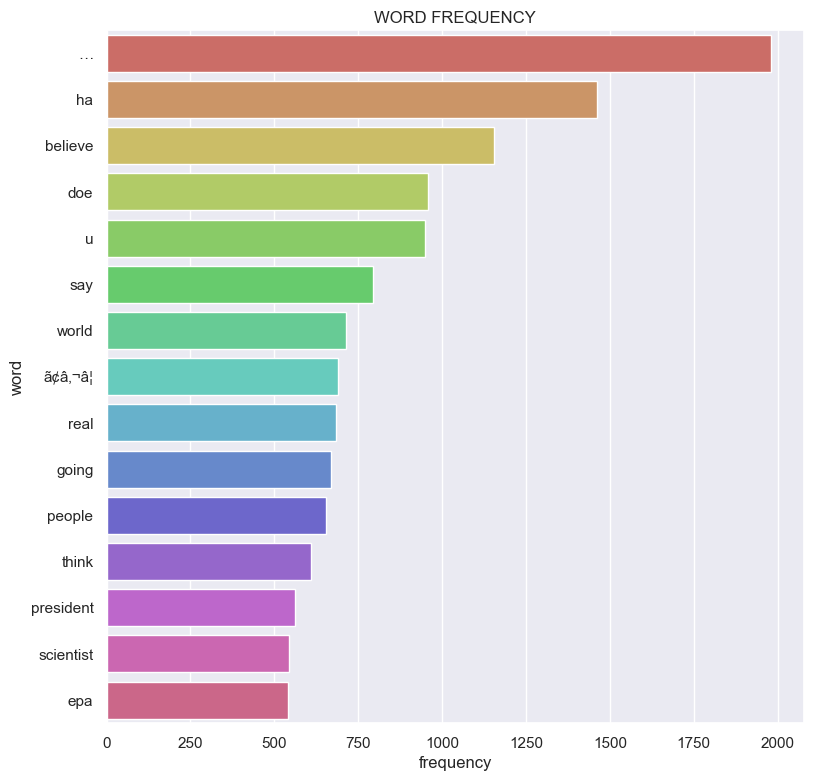

In [30]:
from collections import Counter
# Removing words that has no relevance to the context (https, RT, CO)
df_train['word_cloud'] = df_train['lemmatized'].str.replace('http\S+|www.\S+', '', case=False)

# Removing common words which appear in all sentiments
remove_words = ['climate', 'change', 'rt', 'global', 'warming', 'donald', 'trump','amp', 'realDonaldTrump', 's','aaa']

# Function to remove common words listed above
def remove_common_words(message):
  pattern = re.compile(r'\b(' + r'|'.join(remove_words) + r')\b\s*')
  message = pattern.sub('', message)
  return message

df_train['word_cloud'] = df_train['word_cloud'].apply(remove_common_words)


# Adding select words to stop words for better analysis on important word frequency
stop = set(stopwords.words('english'))
stop_words = ["via", "co", "I",'We','The'] + list(stop)

# Removing stop words from the tweets
df_train['word'] = df_train['word_cloud'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop_words]))
df_train['word'] = df_train['word'].str.replace(r'[^\w\s]+', '')

# Separating the strings to a list of words
word_list = [word for line in df_train['word'] for word in line.split()]

# Creating a word frequency counter
sns.set(style="darkgrid")
counts = Counter(word_list).most_common(15)
counts_df = pd.DataFrame(counts)
counts_df
counts_df.columns = ['word', 'frequency']

# Creating a word frequency plot
fig, ax = plt.subplots(figsize = (9, 9))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df, palette="hls")
plt.title('WORD FREQUENCY')
#plt.savefig('wordcount_bar.png')

#### Tweet Data Analysis

1. Average length of tweets


It is interesting to look at the length of the tweets for each sentiment, which sentiment writes the longest or the shortest tweets.

In [31]:
# Finding Number of Words per Tweet from the lemmatized words
df_train["num_words"] = df_train["lemmatized"].apply(lambda x: len(str(x).split()))


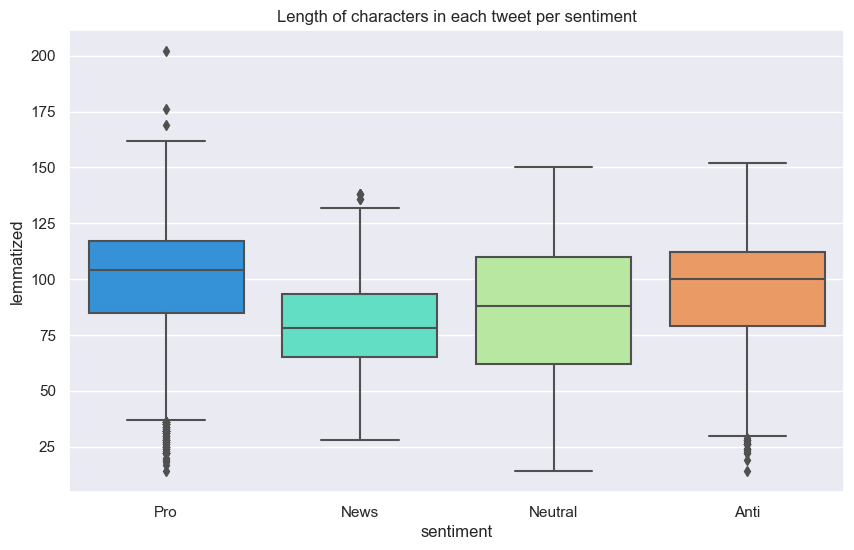

In [32]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment
sns.boxplot(x=df_train['sentiment'], y=df_train['lemmatized'].str.len(), data=df_train, palette=("rainbow"), ax=ax)

# title of the boxplot
plt.title('Length of characters in each tweet per sentiment')

# showing the plot
plt.show()

2. Distribution of tweet length

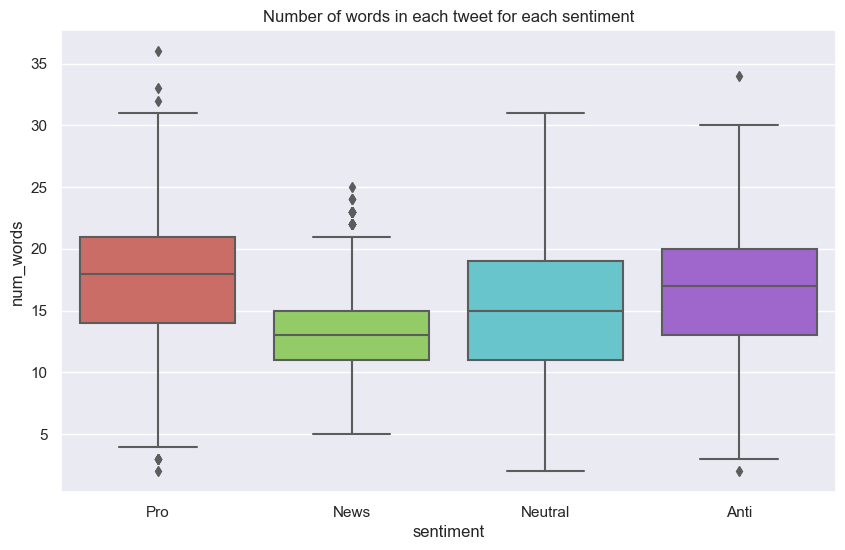

In [33]:
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

# plotting boxplot for the length of how long each tweet is per sentiment
sns.boxplot(x='sentiment', y='num_words', data=df_train, palette=("hls"))

# title of the boxplot
plt.title('Number of words in each tweet for each sentiment')

# showing the plot
plt.show()

#### Hashtag analysis


Now lets look at the hashtags that were used in the tweets. This will give us an indication of which hashtags each sentiment frequently uses. This could possibly help us tell whether a tweet is Pro or Anti climate change.

We previously extracted the hashtags before cleaning the 'message column', we will now use that dataframe of hashtags in our analysis.

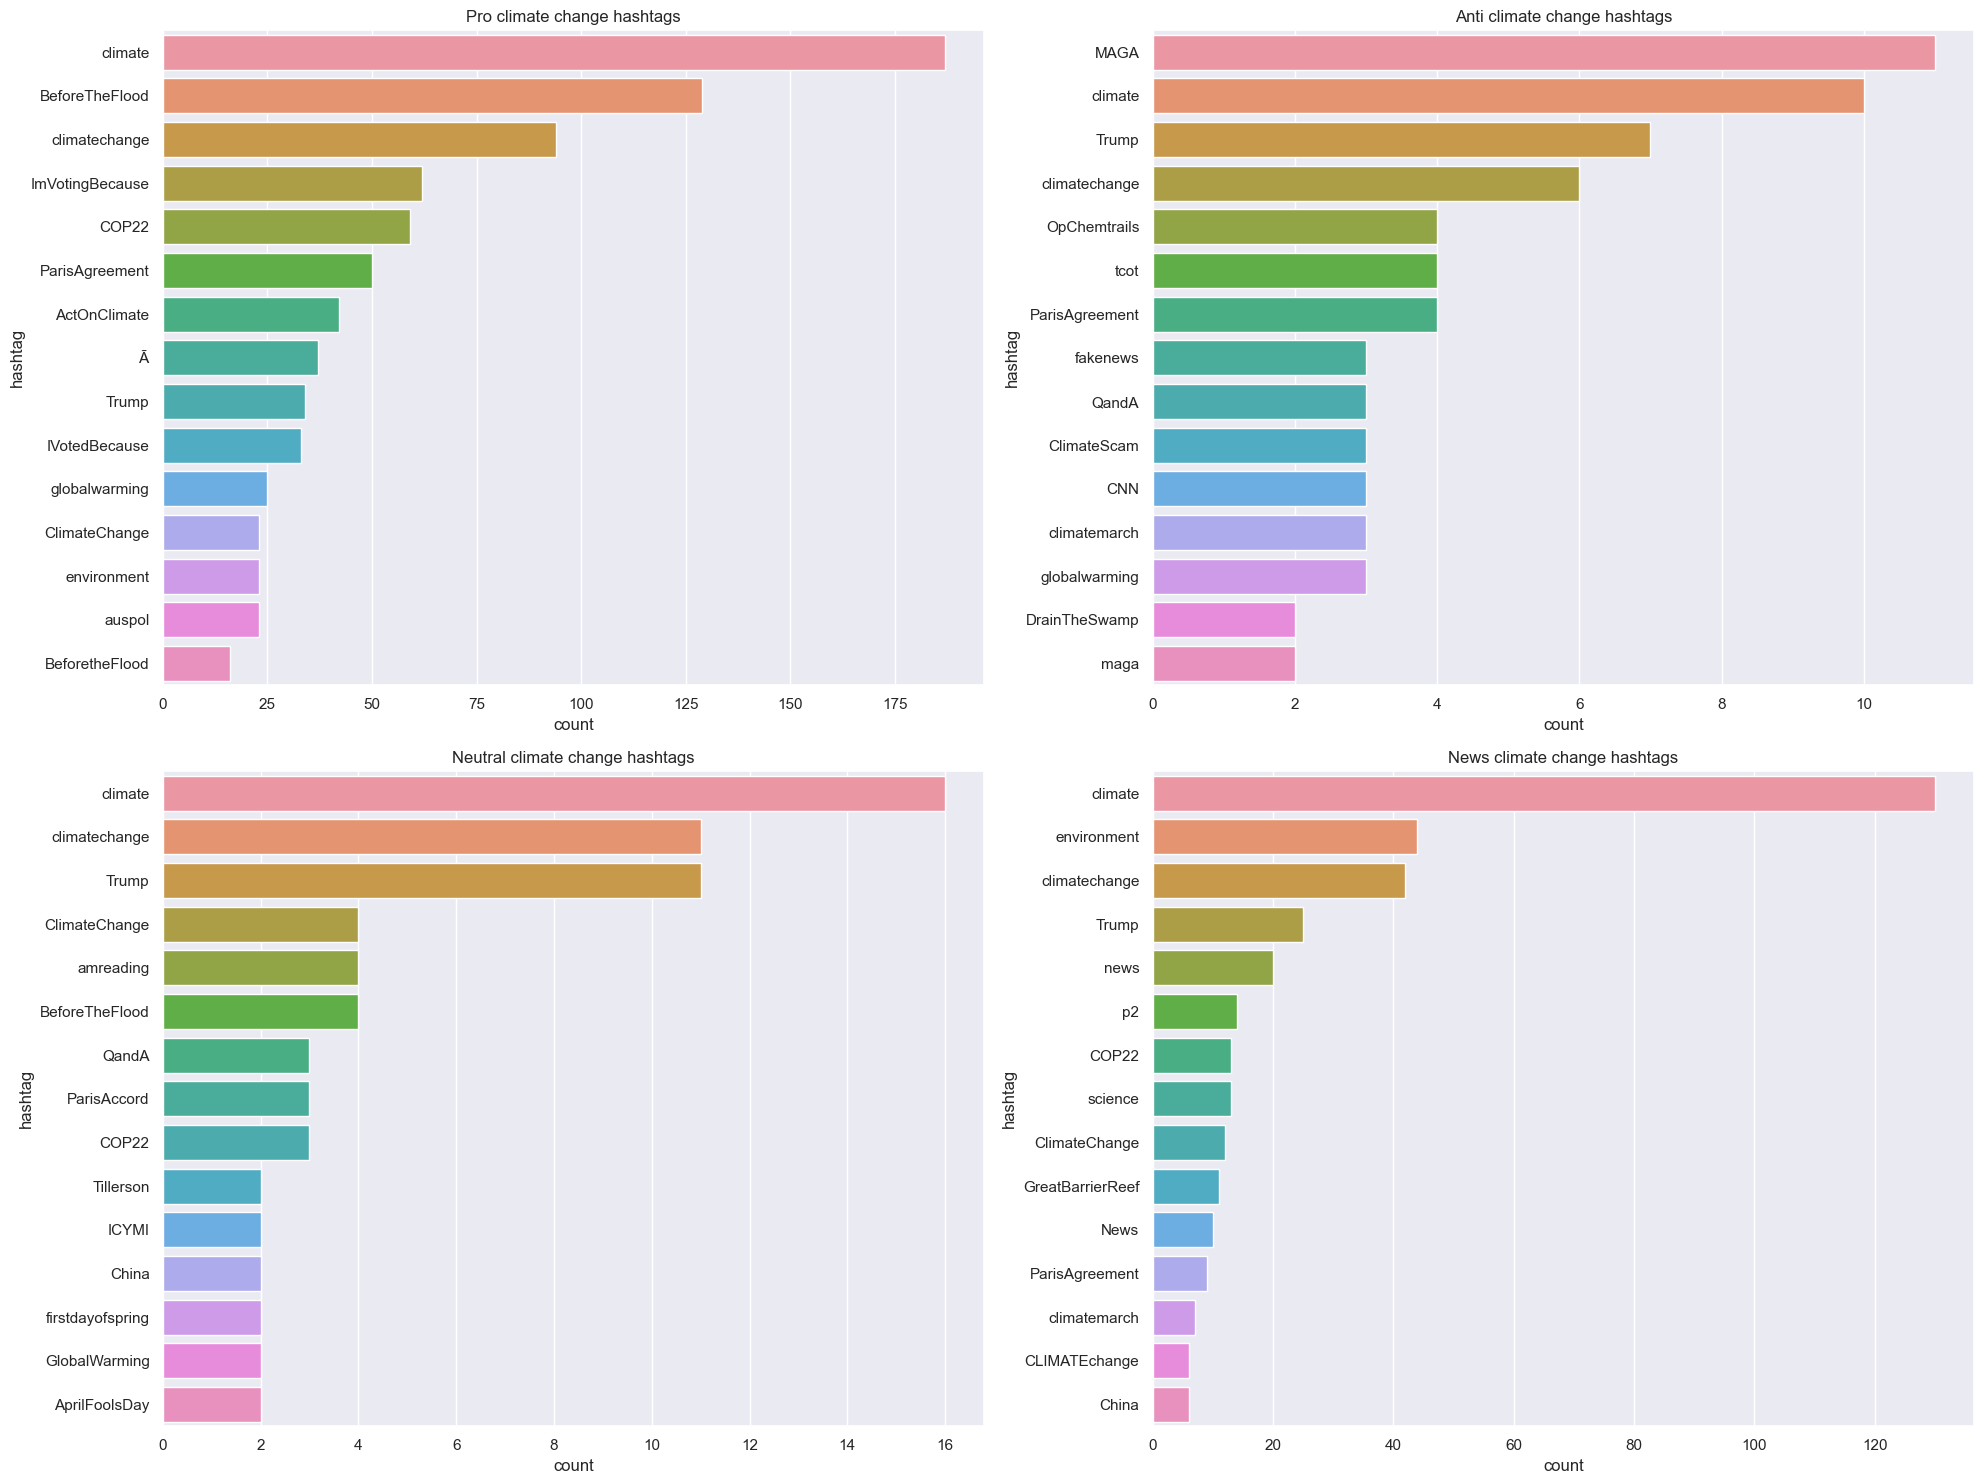

In [34]:
fig, axes = plt.subplots(ncols=2,
                         nrows=2,
                         figsize=(20, 15))

sns.barplot(data=pro,y=pro['hashtag'], x=pro['count'], ax=axes[0,0]).set(title = 'Pro climate change hashtags')

sns.barplot(data=anti,y=anti['hashtag'], x=anti['count'], ax=axes[0,1]).set(title = 'Anti climate change hashtags')

sns.barplot(data=neutral,y=neutral['hashtag'], x=neutral['count'], ax=axes[1,0]).set(title = 'Neutral climate change hashtags')

sns.barplot(data=news,y=news['hashtag'], x=news['count'], ax=axes[1,1]).set(title = 'News climate change hashtags')

plt.tight_layout()

3. Common words and phrases

(-0.5, 1999.5, 999.5, -0.5)

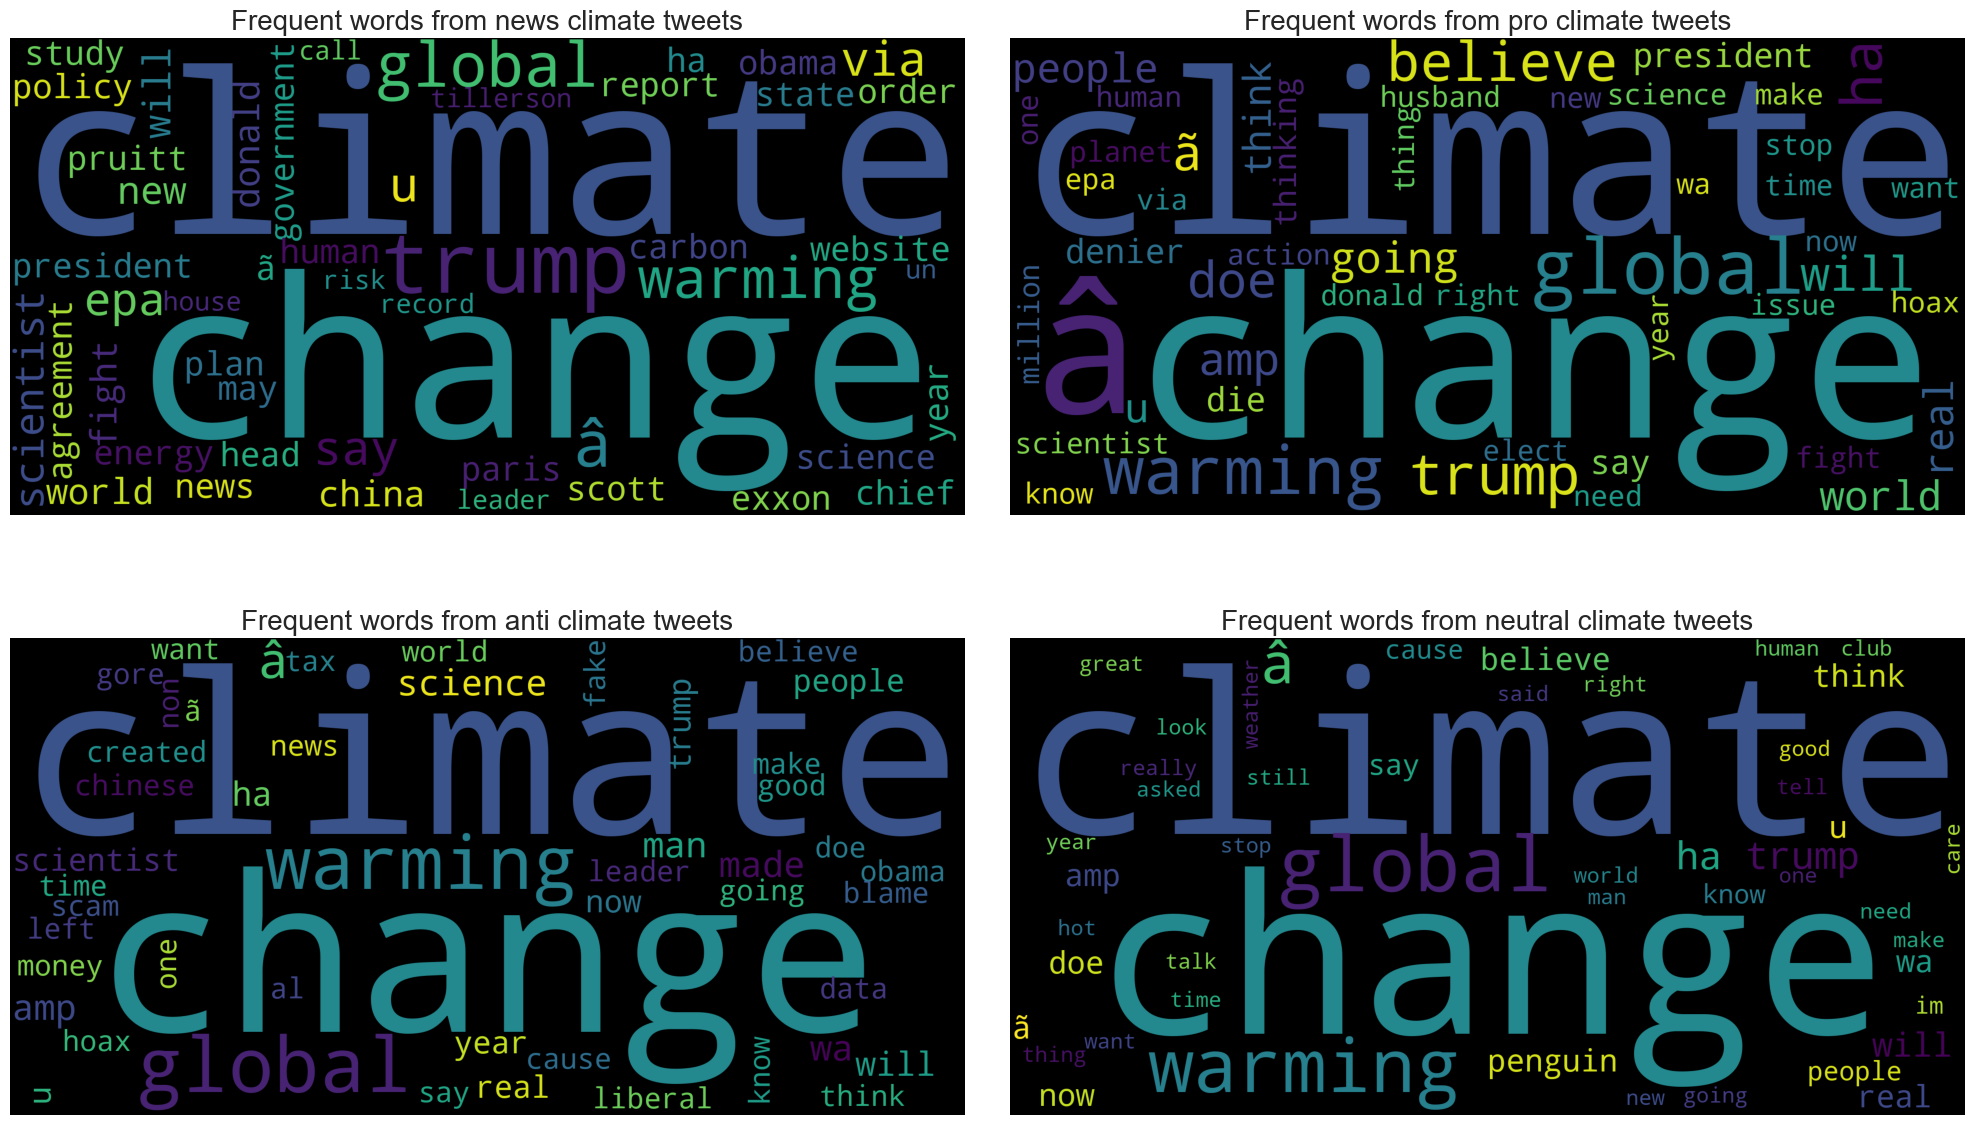

In [35]:
# Plotting word clouds
news = df_train[df_train['sentiment'] == 'News']['lemmatized']
pro = df_train[df_train['sentiment'] == 'Pro']['lemmatized']
neutral =df_train[df_train['sentiment'] == 'Neutral']['lemmatized']
anti = df_train[df_train['sentiment'] == 'Anti']['lemmatized']


news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

news = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(news))

pro = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(pro))



neutral = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(neutral))


anti = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=100,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(anti))


fig, axs = plt.subplots(2, 2, figsize = (20, 12))
fig.tight_layout(pad = 0)

axs[0, 0].imshow(news)
axs[0, 0].set_title('Frequent words from news climate tweets', fontsize = 20)
axs[0, 0].axis('off')

axs[0, 1].imshow(pro)
axs[0, 1].set_title('Frequent words from pro climate tweets', fontsize = 20)
axs[0, 1].axis('off')


axs[1, 0].imshow(anti)
axs[1, 0].set_title('Frequent words from anti climate tweets', fontsize = 20)
axs[1, 0].axis('off')

axs[1, 1].imshow(neutral)
axs[1, 1].set_title('Frequent words from neutral climate tweets', fontsize = 20)
axs[1, 1].axis('off')
#plt.savefig('joint_cloud.png')

4. Bigram Analyis for each Sentiment

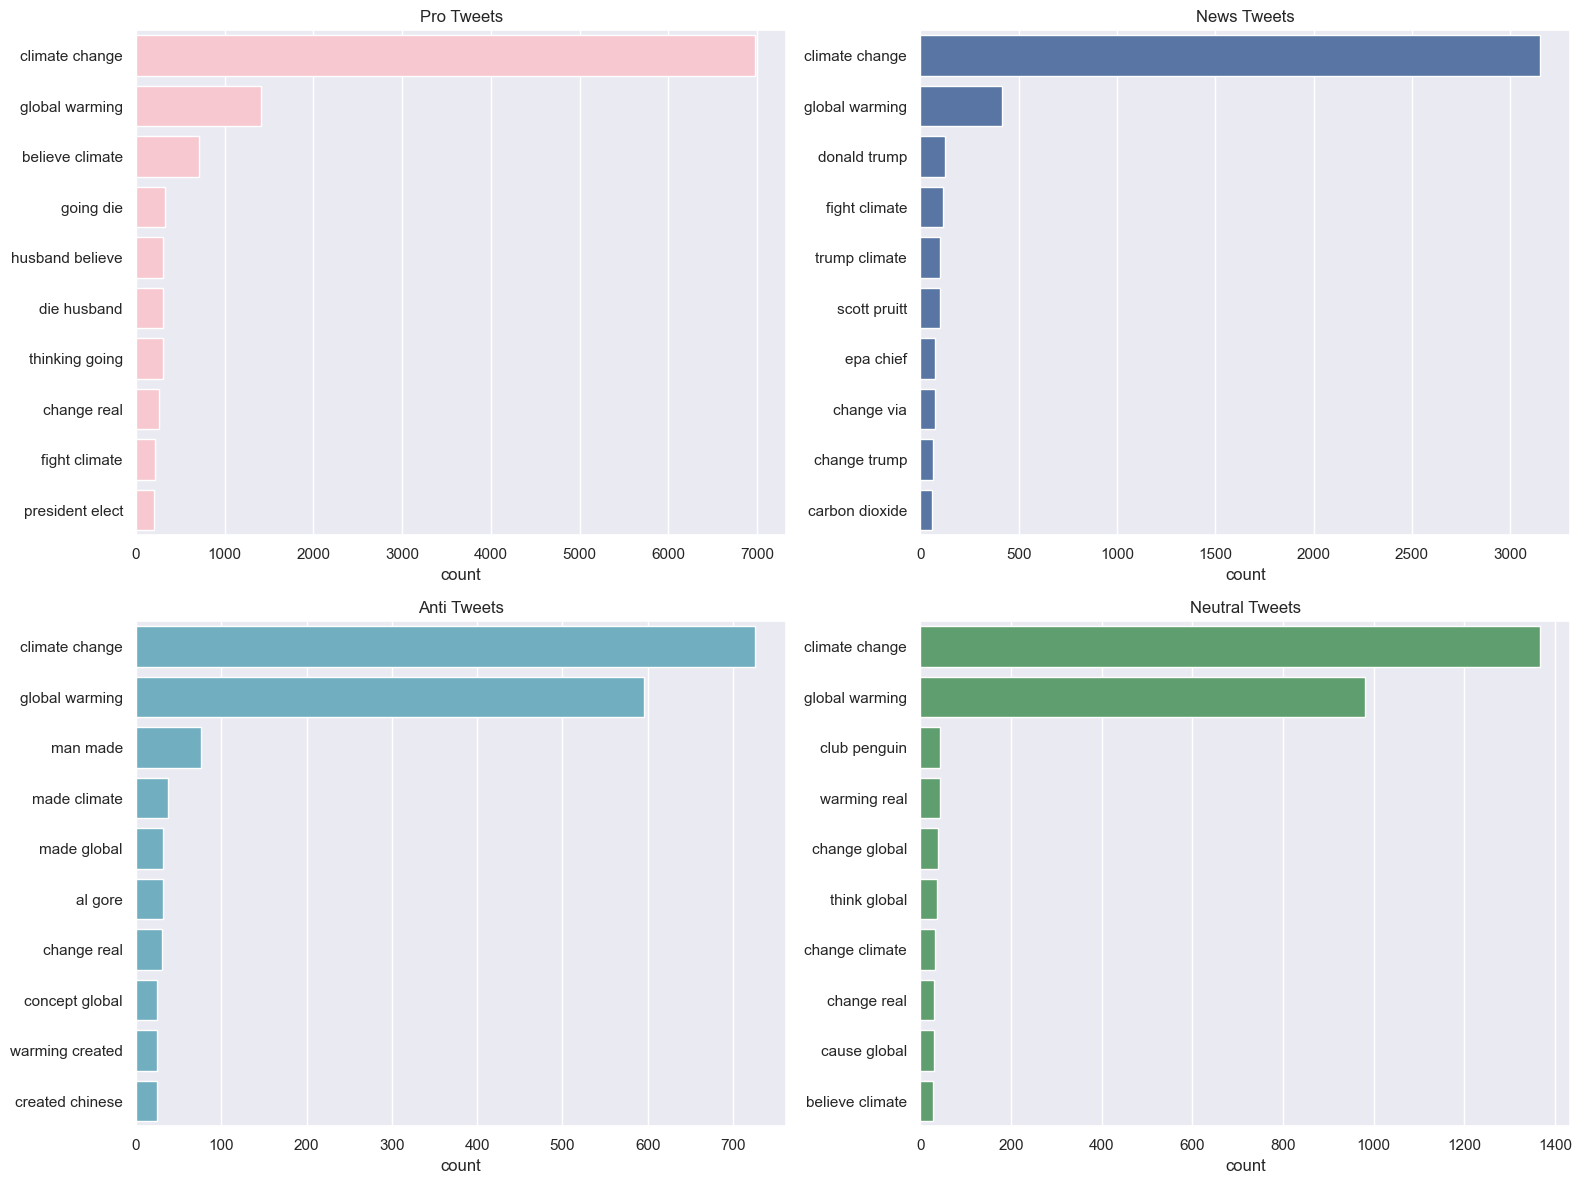

In [36]:
from wordcloud import STOPWORDS
fig.suptitle('Bigrams in Tweets')
stopwords = set(STOPWORDS)
more_stopwords = {'https', 'https rt', 'rt'}  # Remove 'rt' from stopwords
stopwords = stopwords.union(more_stopwords)

# Create subplots for different sentiment categories
plt.figure(figsize=(16, 12))

# Plot for the Pro sentiment of the bigrams
plt.subplot(2, 2, 1)
bigram_d = list(bigrams([w for w in word_tokenize(' '.join(df_train.loc[df_train.sentiment == 'Pro', 'clean_message']).lower()) if
                        (w not in stopwords) & (w.isalpha())]))
d_fq = FreqDist(bg for bg in bigram_d)
bgdf_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
bgdf_d.index = bgdf_d.index.map(lambda x: ' '.join(x))
bgdf_d = bgdf_d.sort_values('count', ascending=False)
sns.barplot(x=bgdf_d.head(10)['count'], y=bgdf_d.index[:10], color='pink')
plt.title('Pro Tweets')

# Plot for the News sentiment of the bigrams
plt.subplot(2, 2, 2)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_train.loc[df_train.sentiment == 'News', 'clean_message']).lower()) if
                        (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count', ascending=False)
sns.barplot(x=bgdf_nd.head(10)['count'], y=bgdf_nd.index[:10], color='b')
plt.title('News Tweets')

# Plot for the Anti sentiment of the bigrams
plt.subplot(2, 2, 3)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_train.loc[df_train.sentiment == 'Anti', 'clean_message']).lower()) if
                        (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count', ascending=False)
sns.barplot(x=bgdf_nd.head(10)['count'], y=bgdf_nd.index[:10], color='c')
plt.title('Anti Tweets')

# Plot for the Neutral sentiment of the bigrams
plt.subplot(2, 2, 4)
bigram_nd = list(bigrams([w for w in word_tokenize(' '.join(df_train.loc[df_train.sentiment == 'Neutral', 'clean_message']).lower()) if
                        (w not in stopwords) & (w.isalpha())]))
nd_fq = FreqDist(bg for bg in bigram_nd)
bgdf_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
bgdf_nd.index = bgdf_nd.index.map(lambda x: ' '.join(x))
bgdf_nd = bgdf_nd.sort_values('count', ascending=False)
sns.barplot(x=bgdf_nd.head(10)['count'], y=bgdf_nd.index[:10], color='g')
plt.title('Neutral Tweets')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

In [37]:
from nltk.util import ngrams

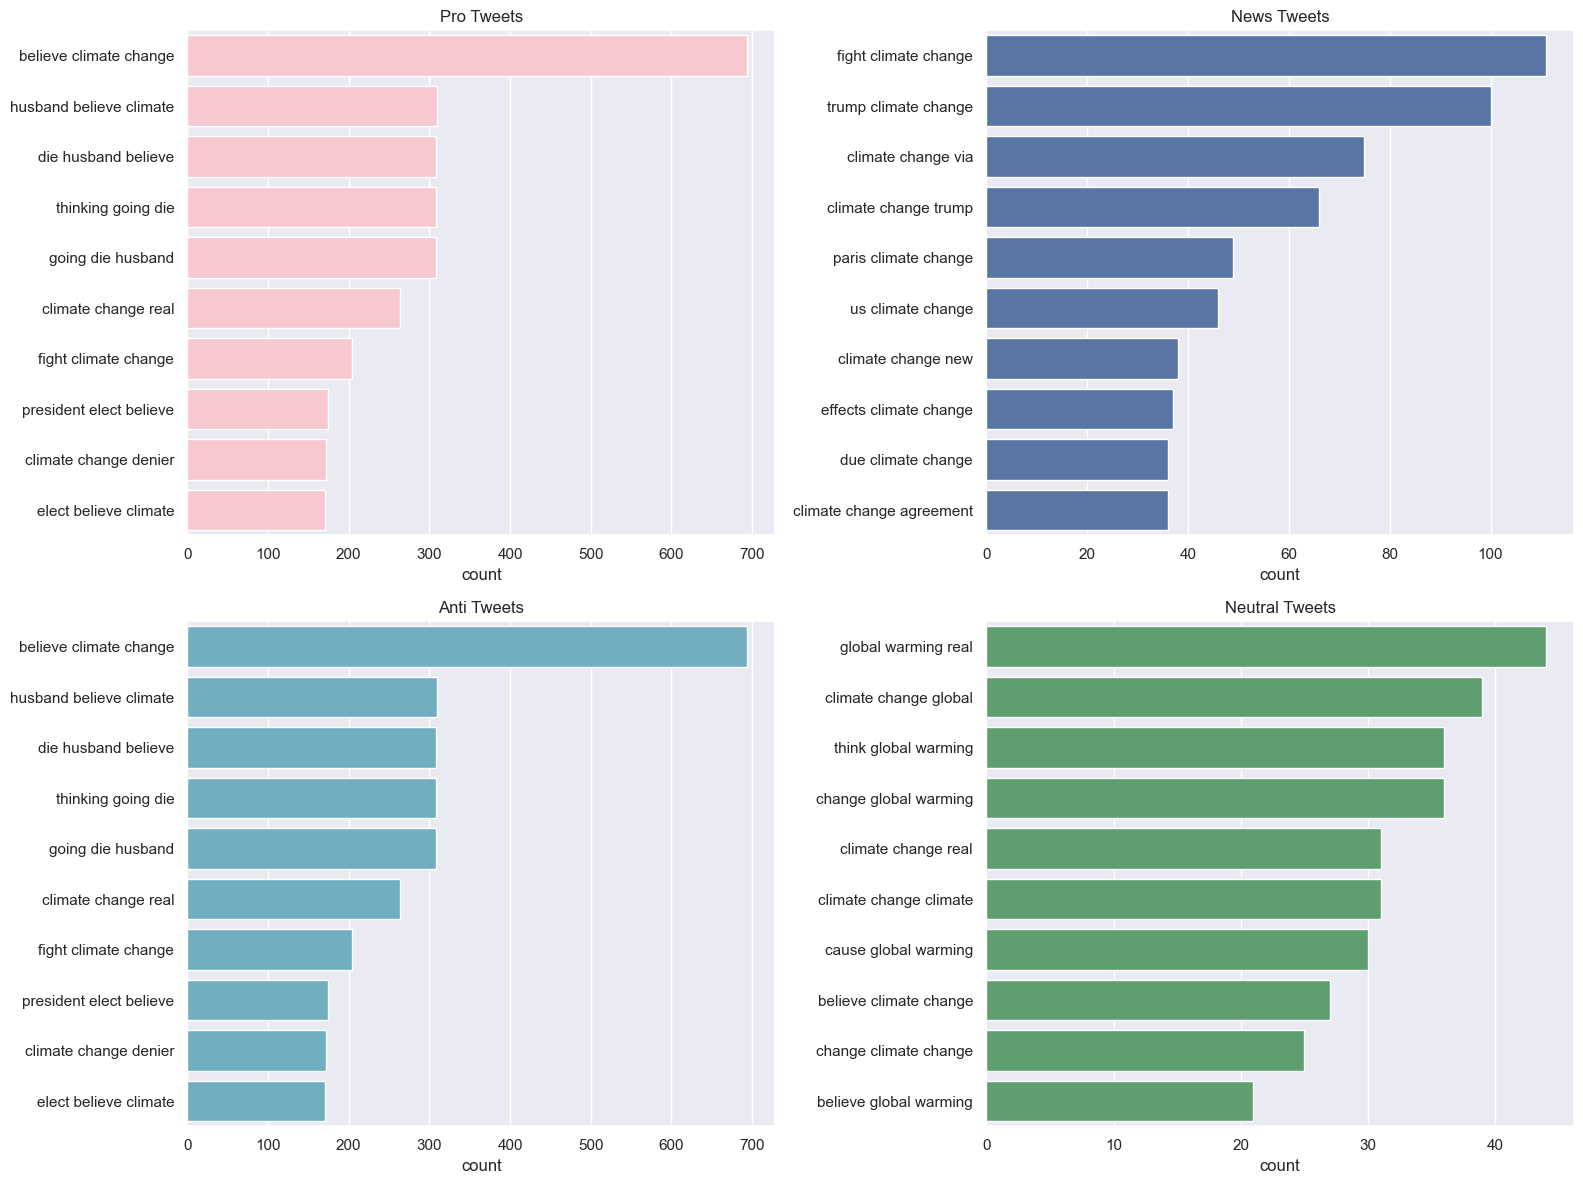

In [38]:
# Make a set of stop words
fig.suptitle('Trigrams in Tweets')
stopwords = set(STOPWORDS)
more_stopwords = {'https', 'https rt', 'rt'}  # Remove 'rt' from stopwords
stopwords = stopwords.union(more_stopwords)

# Create subplots for different sentiment categories
plt.figure(figsize=(16, 12))

# Function to extract trigrams from text
def extract_trigrams(text):
    tokens = [w for w in word_tokenize(text.lower()) if (w not in stopwords) and (w.isalpha())]
    trigram = list(ngrams(tokens, 3))
    return trigram

# Plot for the Pro sentiment of the trigrams
plt.subplot(2, 2, 1)
trigrams_d = extract_trigrams(' '.join(df_train.loc[df_train.sentiment == 'Pro', 'clean_message']))
d_fq = FreqDist(trigram for trigram in trigrams_d)
trigram_df_d = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
trigram_df_d.index = trigram_df_d.index.map(lambda x: ' '.join(x))
trigram_df_d = trigram_df_d.sort_values('count', ascending=False)
sns.barplot(x=trigram_df_d.head(10)['count'], y=trigram_df_d.index[:10], color='pink')
plt.title('Pro Tweets')

# Plot for the News sentiment of the trigrams
plt.subplot(2, 2, 2)
trigrams_nd = extract_trigrams(' '.join(df_train.loc[df_train.sentiment == 'News', 'clean_message']))
nd_fq = FreqDist(trigram for trigram in trigrams_nd)
trigram_df_nd = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
trigram_df_nd.index = trigram_df_nd.index.map(lambda x: ' '.join(x))
trigram_df_nd = trigram_df_nd.sort_values('count', ascending=False)
sns.barplot(x=trigram_df_nd.head(10)['count'], y=trigram_df_nd.index[:10], color='b')
plt.title('News Tweets')

# Plot for the Anti sentiment of the trigrams
plt.subplot(2, 2, 3)
trigrams_a = extract_trigrams(' '.join(df_train.loc[df_train.sentiment == 'Anti', 'clean_message']))
nd_fq = FreqDist(trigram for trigram in trigrams_a)
trigram_df_a = pd.DataFrame.from_dict(d_fq, orient='index', columns=['count'])
trigram_df_a.index = trigram_df_a.index.map(lambda x: ' '.join(x))
trigram_df_a = trigram_df_a.sort_values('count', ascending=False)
sns.barplot(x=trigram_df_a.head(10)['count'], y=trigram_df_a.index[:10], color='c')
plt.title('Anti Tweets')

# Plot for the Neutral sentiment of the trigrams
plt.subplot(2, 2, 4)
trigrams_n = extract_trigrams(' '.join(df_train.loc[df_train.sentiment == 'Neutral', 'clean_message']))
nd_fq = FreqDist(trigram for trigram in trigrams_n)
trigram_df_n = pd.DataFrame.from_dict(nd_fq, orient='index', columns=['count'])
trigram_df_n.index = trigram_df_n.index.map(lambda x: ' '.join(x))
trigram_df_n = trigram_df_n.sort_values('count', ascending=False)
sns.barplot(x=trigram_df_n.head(10)['count'], y=trigram_df_n.index[:10], color='g')
plt.title('Neutral Tweets')

plt.tight_layout()  # To ensure proper spacing between subplots
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| Clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [39]:
df_combined = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [40]:
from nltk.corpus import stopwords
def preprocessing(text):
    # Remove mentions (@user), URLs, and special characters
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Remove mentions
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove special characters

    # Convert to lowercase
    text = text.lower()

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_text = [word for word in text.split() if word.lower() not in stop_words]

    # Join the filtered words back into a sentence
    cleaned_message = ' '.join(filtered_text)

    return cleaned_message

# Apply the preprocessing function to the 'message' column
df_combined['processed_message'] = df_combined['message'].apply(preprocessing)


In [41]:
def tokenize(text):
    # Tokenization
    tokens = word_tokenize(text)
    return tokens
# Apply the tokenize function to the 'processed_message' column
df_combined['tokens'] = df_combined['processed_message'].apply(tokenize)

In [42]:
#Lemma
def lemmatize(tokens):
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply the lemmatize function to the 'tokens' column
df_combined['lemma'] = df_combined['tokens'].apply(lemmatize)


In [43]:
df_train = df_combined.iloc[:len(df_train)]
df_test = df_combined.iloc[len(df_train):]

In [44]:
df_train

,sentiment,message,tweetid,tweet_length,mentions,clean_message,tokenized,lemmatized,word_cloud,word,num_words,processed_message,tokens,lemma
0,Pro,PolySciMajor EPA chief doesn't think carbon di...,625221,140.0,[mashable],polyscimajor epa chief does not think carbon d...,"[polyscimajor, epa, chief, does, not, think, c...",polyscimajor epa chief doe not think carbon di...,polyscimajor epa chief doe not think carbon di...,polyscimajor epa chief doe think carbon dioxid...,18.0,polyscimajor epa chief doesnt think carbon dio...,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,Pro,It's not like we lack evidence of anthropogeni...,126103,62.0,[],its not like we lack evidence of anthropogenic...,"[its, not, like, we, lack, evidence, of, anthr...",it not like we lack evidence of anthropogenic ...,it not like we lack evidence of anthropogenic,like lack evidence anthropogenic,10.0,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, ...","[like, lack, evidence, anthropogenic, global, ..."
2,News,RT : Researchers say we have three years to ac...,698562,140.0,[RawStory],researchers say we have three years to act on...,"[researchers, say, we, have, three, years, to,...",researcher say we have three year to act on cl...,researcher say we have three year to act on be...,researcher say three year act it’ late …,16.0,rt researchers say three years act climate cha...,"[rt, researchers, say, three, years, act, clim...","[rt, researcher, say, three, year, act, climat..."
3,Pro,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,99.0,[],todayinmaker wired was a pivotal year in the w...,"[todayinmaker, wired, was, a, pivotal, year, i...",todayinmaker wired wa a pivotal year in the wa...,todayinmaker wired wa a pivotal year in the wa...,todayinmaker wired wa pivotal year war,12.0,todayinmaker wired pivotal year war climate ch...,"[todayinmaker, wired, pivotal, year, war, clim...","[todayinmaker, wired, pivotal, year, war, clim..."
4,Pro,"RT : It's 2016, and a racist, sexist, climate ...",466954,122.0,[SoyNovioDeTodas],its and a racist sexist climate change denyin...,"[its, and, a, racist, sexist, climate, change,...",it and a racist sexist climate change denying ...,it and a racist sexist denying bigot is leadin...,racist sexist denying bigot leading poll elect...,15.0,rt racist sexist climate change denying bigot ...,"[rt, racist, sexist, climate, change, denying,...","[rt, racist, sexist, climate, change, denying,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,Pro,RT : They took down the material on global war...,22001,140.0,[ezlusztig],they took down the material on global warming...,"[they, took, down, the, material, on, global, ...",they took down the material on global warming ...,they took down the material on lgbt right and ...,took material lgbt right health care hocking m...,22.0,rt took material global warming lgbt rights he...,"[rt, took, material, global, warming, lgbt, ri...","[rt, took, material, global, warming, lgbt, ri..."
15815,News,RT : How climate change could be breaking up a...,17856,119.0,[washingtonpost],how climate change could be breaking up a mil...,"[how, climate, change, could, be, breaking, up...",how climate change could be breaking up a mill...,how could be breaking up a million year old re...,could breaking million year old relationship,12.0,rt climate change could breaking millionyearol...,"[rt, climate, change, could, breaking, million...","[rt, climate, change, could, breaking, million..."
15816,Neutral,notiven: RT: nytimesworld :What does Trump act...,384248,133.0,[],notiven nytimesworld what does trump actually...,"[notiven, nytimesworld, what, does, trump, act...",notiven nytimesworld what doe trump actually b...,notiven nytimesworld what doe actually believe...,notiven nytimesworld doe actually believe rick...,17.0,notiven rt nytimesworld trump actually believe...,"[notiven, rt, nytimes

In [45]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    words = df_train['clean_message']
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [46]:
words = df_train['clean_message']

In [47]:
clean_message = {}

# Grouping by 'clean_message'
grouped_df = df_train.groupby('clean_message')

# Iterating over unique messages
for message, group in grouped_df:
    clean_message[message] = {}

    # Iterating over rows in the group
    for row in group['clean_message']:
        clean_message[message] = bag_of_words_count(row, clean_message[message])

# Now clean_message should contain bag-of-words representations for each unique message


In [ ]:
all_words = set()

for pp in words:
    # Check if the key exists in the dictionary
    if pp in clean_message:
        for word in clean_message[pp]:
            all_words.add(word)

# Assuming 'all' is a key in the dictionary
total_words = sum([v for v in clean_message.get('all', {}).values()])


In [ ]:
from collections import Counter

# Assuming clean_message is a dictionary with word frequencies for different categories
clean_message['all'] = Counter()

for pp in words:
    for word, frequency in clean_message[pp].items():
        clean_message['all'][word] += frequency

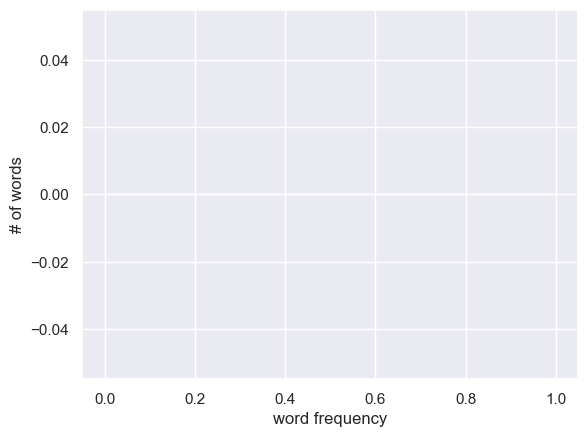

In [ ]:
# Assuming clean_message is a dictionary with word frequencies for a specific category, like 'all'
word_frequencies = clean_message['all'].values()

plt.hist([v for v in word_frequencies if v < 10], bins=10, density=False)
plt.ylabel("# of words")
plt.xlabel("word frequency")
plt.show()

The histogram above displays that there are no words that appear in the tweets less than 10 times.

In [ ]:
from collections import Counter

# Assuming 'clean_message' is a column in your DataFrame
words = df_train['clean_message'].str.split().explode()

# Count occurrences of each word
word_counts = Counter(words)

In [ ]:
# Filter out rare words
rare_words = [word for word, count in word_counts.items() if count < 2000]

print(rare_words[:100])

['polyscimajor', 'epa', 'chief', 'does', 'think', 'carbon', 'dioxide', 'main', 'cause', 'wait', 'what', 'via', 'its', 'like', 'we', 'lack', 'evidence', 'anthropogenic', 'researchers', 'say', 'have', 'three', 'years', 'act', 'before', 'it’', 'too', 'late', '…', 'todayinmaker', 'wired', 'was', 'pivotal', 'year', 'war', 'racist', 'sexist', 'denying', 'bigot', 'leading', 'polls', 'electionnigh', 'worth', 'read', 'whether', 'you', 'do', 'or', 'believe', 'mike', 'pence', 'doesn’', 'that', 'smoking', 'causes', 'lung', 'cancer', 'six', 'big', 'things', 'can', 'all', 'today', 'fight', 'how', 'be', 'activistã¢â‚¬â¦', 'hã¢â‚¬â¦', 'my', 'eight', 'old', 'nephew', 'inconsolable', 'he', 'wants', 'die', 'age', 'me', 'but', 'will', 'perish', 'fiery', 'hellscape', 'no', 'offense…', 'like…', 'just', 'believe…', 'warming………', 'she', 'has', 'thinking', 'about', 'going', 'because', 'your', 'husband', 'ã¢â‚¬â¦', 'i', 'hope']


In [ ]:
df_test

,sentiment,message,tweetid,tweet_length,mentions,clean_message,tokenized,lemmatized,word_cloud,word,num_words,processed_message,tokens,lemma
15819,NaN,Europe will now be looking to China to make su...,169760,NaN,NaN,europe will now be looking to china to make su...,NaN,NaN,NaN,NaN,NaN,europe looking china make sure alone fighting ...,"[europe, looking, china, make, sure, alone, fi...","[europe, looking, china, make, sure, alone, fi..."
15820,NaN,Combine this with the polling of staffers re c...,35326,NaN,NaN,combine this with the polling of staffers re c...,NaN,NaN,NaN,NaN,NaN,combine polling staffers climate change womens...,"[combine, polling, staffers, climate, change, ...","[combine, polling, staffer, climate, change, w..."
15821,NaN,"The scary, unimpeachable evidence that climate...",224985,NaN,NaN,the scary unimpeachable evidence that climate ...,NaN,NaN,NaN,NaN,NaN,scary unimpeachable evidence climate change al...,"[scary, unimpeachable, evidence, climate, chan...","[scary, unimpeachable, evidence, climate, chan..."
15822,NaN,\r\nPutin got to you too Jill ! \r\nTrump ...,476263,NaN,NaN,putin got to you too jill trump does not belie...,NaN,NaN,NaN,NaN,NaN,putin got jill trump doesnt believe climate ch...,"[putin, got, jill, trump, doesnt, believe, cli...","[putin, got, jill, trump, doesnt, believe, cli..."
15823,NaN,RT : 'Female orgasms cause global warming!'\r\...,872928,NaN,NaN,female orgasms cause global warming sarcastic...,NaN,NaN,NaN,NaN,NaN,rt female orgasms cause global warming sarcast...,"[rt, female, orgasms, cause, global, warming, ...","[rt, female, orgasm, cause, global, warming, s..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26360,NaN,"RT : Brb, writing a poem about climate change....",895714,NaN,NaN,brb writing a poem about climate change clima...,NaN,NaN,NaN,NaN,NaN,rt brb writing poem climate change climatechan...,"[rt, brb, writing, poem, climate, change, clim...","[rt, brb, writing, poem, climate, change, clim..."
26361,NaN,2016: the year climate change came home: Durin...,875167,NaN,NaN,the year climate change came home during the h...,NaN,NaN,NaN,NaN,NaN,year climate change came home hottest year rec...,"[year, climate, change, came, home, hottest, y...","[year, climate, change, came, home, hottest, y..."
26362,NaN,RT : Pacific countries positive about Fiji lea...,78329,NaN,NaN,pacific countries positive about fiji leading...,NaN,NaN,NaN,NaN,NaN,rt pacific countries positive fiji leading glo...,"[rt, pacific, countries, positive, fiji, leadi...","[rt, pacific, country, positive, fiji, leading..."
26363,NaN,"RT : You’re so hot, you must be the cause for ...",867455,NaN,NaN,you’re so hot you must be the cause for globa...,NaN,NaN,NaN,NaN,NaN,rt youre hot must cause global warming aldubla...,"[rt, youre, hot, must, cause, global, warming,...","[rt, youre, hot, must, cause, global, warming,..."


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| Create one or more classification models that are able to accurately predict |

---

In [ ]:
# Convert processed tokens to text
df_train['lemma'] = df_train['lemma'].apply(lambda tokens: ' '.join(tokens))
df_test['lemma'] = df_test['lemma'].apply(lambda tokens: ' '.join(tokens))


C:\Users\user\AppData\Local\Temp\ipykernel_15452\2627368980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['lemma'] = df_train['lemma'].apply(lambda tokens: ' '.join(tokens))
C:\Users\user\AppData\Local\Temp\ipykernel_15452\2627368980.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['lemma'] = df_test['lemma'].apply(lambda tokens: ' '.join(tokens))


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_train['lemma'], df_train['sentiment'], test_size=0.2, random_state=42)


In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=50000)  # You can adjust the number of features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# Train the SVM classifier
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = svm_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.7345132743362832
Classification Report:
              precision    recall  f1-score   support

        Anti       0.88      0.27      0.42       278
     Neutral       0.76      0.31      0.44       425
        News       0.80      0.68      0.74       706
         Pro       0.71      0.93      0.81      1755

    accuracy                           0.73      3164
   macro avg       0.79      0.55      0.60      3164
weighted avg       0.75      0.73      0.71      3164



In [ ]:
# Assuming df_test is your test DataFrame with 'tweetid' and 'lemma' columns
X_test_tfidf = tfidf_vectorizer.transform(df_test['lemma'])

# Make predictions on the test set
predictions = svm_classifier.predict(X_test_tfidf)

# Create a DataFrame for submission
df_submission = pd.DataFrame({'tweetid': df_test['tweetid'], 'sentiment': predictions})

# Save the DataFrame to a CSV file
df_submission.to_csv('svm_submission.csv', index=False)

# Optionally, print accuracy and classification report
print("Number of Rows:", len(df_submission))
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Number of Rows: 10546
Accuracy: 0.7345132743362832
Classification Report:
              precision    recall  f1-score   support

        Anti       0.88      0.27      0.42       278
     Neutral       0.76      0.31      0.44       425
        News       0.80      0.68      0.74       706
         Pro       0.71      0.93      0.81      1755

    accuracy                           0.73      3164
   macro avg       0.79      0.55      0.60      3164
weighted avg       0.75      0.73      0.71      3164



In [ ]:
# Assuming df_test['tweetid'] has 10564 rows
# Use the correct DataFrame for the number of rows
df_submission = pd.DataFrame({'tweetid': df_test['tweetid'].iloc[:len(predictions)], 'sentiment': predictions})

# Save the DataFrame to a CSV file
df_submission.to_csv('svm_submission.csv', index=False)


In [ ]:
# Tokenize and preprocess text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_pad = tokenizer.texts_to_sequences(X_train)
X_test_pad = tokenizer.texts_to_sequences(X_test)

# Pad sequences
max_len = 75  # Choose an appropriate value
X_train_pad = pad_sequences(X_train_pad, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_pad, maxlen=max_len, padding='post')

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(Conv1D(256, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Use a lower learning rate and add a learning rate scheduler
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with more epochs
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_encoded)
print(f"Test Accuracy: {accuracy}")


COMET INFO: Ignoring automatic log_parameter('verbose') because 'keras:verbose' is in COMET_LOGGING_PARAMETERS_IGNORE


Epoch 1/10


159/159 [==============================] - 10s 55ms/step - loss: 1.0240 - accuracy: 0.5899 - val_loss: 0.8396 - val_accuracy: 0.6586
Epoch 2/10
159/159 [==============================] - 8s 49ms/step - loss: 0.6424 - accuracy: 0.7536 - val_loss: 0.7635 - val_accuracy: 0.7116
Epoch 3/10
159/159 [==============================] - 8s 49ms/step - loss: 0.3196 - accuracy: 0.8917 - val_loss: 0.8599 - val_accuracy: 0.7064
Epoch 4/10
159/159 [==============================] - 8s 50ms/step - loss: 0.1376 - accuracy: 0.9599 - val_loss: 1.0647 - val_accuracy: 0.6942
Epoch 5/10
159/159 [==============================] - 8s 48ms/step - loss: 0.0684 - accuracy: 0.9814 - val_loss: 1.2032 - val_accuracy: 0.7029
Epoch 6/10
159/159 [==============================] - 7s 46ms/step - loss: 0.0418 - accuracy: 0.9901 - val_loss: 1.3168 - val_accuracy: 0.7009
Epoch 7/10
159/159 [==============================] - 7s 46ms/step - loss: 0.0290 - accuracy: 0.9939 - val_loss: 1.3833 - val_accuracy: 0.6

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# Build CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_onehot, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_onehot)
print(f"Test Accuracy: {accuracy}")


Epoch 1/5
159/159 [==============================] - 6s 29ms/step - loss: 1.0160 - accuracy: 0.5867 - val_loss: 0.8301 - val_accuracy: 0.6650
Epoch 2/5
159/159 [==============================] - 5s 29ms/step - loss: 0.6129 - accuracy: 0.7615 - val_loss: 0.7486 - val_accuracy: 0.7080
Epoch 3/5
159/159 [==============================] - 5s 30ms/step - loss: 0.2798 - accuracy: 0.9081 - val_loss: 0.8625 - val_accuracy: 0.7060
Epoch 4/5
159/159 [==============================] - 4s 28ms/step - loss: 0.1075 - accuracy: 0.9689 - val_loss: 1.0210 - val_accuracy: 0.6918
Epoch 5/5
99/99 [==============================] - 0s 4ms/step - loss: 1.2341 - accuracy: 0.7102
Test Accuracy: 0.7101770043373108


In [ ]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = random_forest_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

In [ ]:
import matplotlib.pyplot as plt

svm_accuracy =  0.7345132743362832  
cnn_accuracy =   0.7051200866699219
cnn_two_accuracy =  0.7082806825637817


models = ['SVM', 'CNN', 'CNN_TWO']

accuracies = [svm_accuracy, cnn_accuracy,cnn_two_accuracy ]

plt.bar(models, accuracies, color=['green', 'red', 'orange'])

plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.show()